In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = sns.load_dataset('iris')
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
print(df.info())
print(df.shape)

<class 'pandas.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    str    
dtypes: float64(4), str(1)
memory usage: 6.0 KB
None
(150, 5)


In [35]:
print(df['species'].value_counts())

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [36]:
print(df.isna().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [37]:
df['especies_num'] = df['species']
df['especies_num'] = df['especies_num'].replace(['setosa', 'versicolor', 'virginica'], ['0', '1', '2'])
df['especies_num'] = df['especies_num'].astype('int')
print(df.info())

<class 'pandas.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    str    
 5   especies_num  150 non-null    int64  
dtypes: float64(4), int64(1), str(1)
memory usage: 7.2 KB
None


In [38]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']].values
y = df[['especies_num']].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(np.shape(X_train))
print(np.shape(X_test))

(105, 4)
(45, 4)


In [39]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [40]:
y_pred = clf.predict(X_test)
print('Prediccion ', y_pred)
print('Especie real', np.reshape(y_test,(1,45)))

Prediccion  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Especie real [[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2
  1 0 0 0 2 1 1 0 0]]


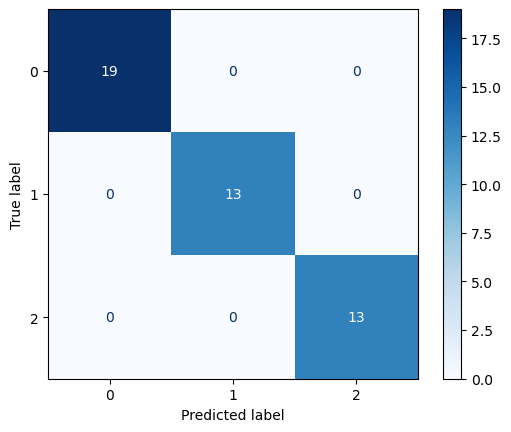

In [41]:
#confussion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [42]:
#Classificatin report
report = classification_report(y_test, y_pred, labels=clf.classes_)
print("classification_report")
print(report)

classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



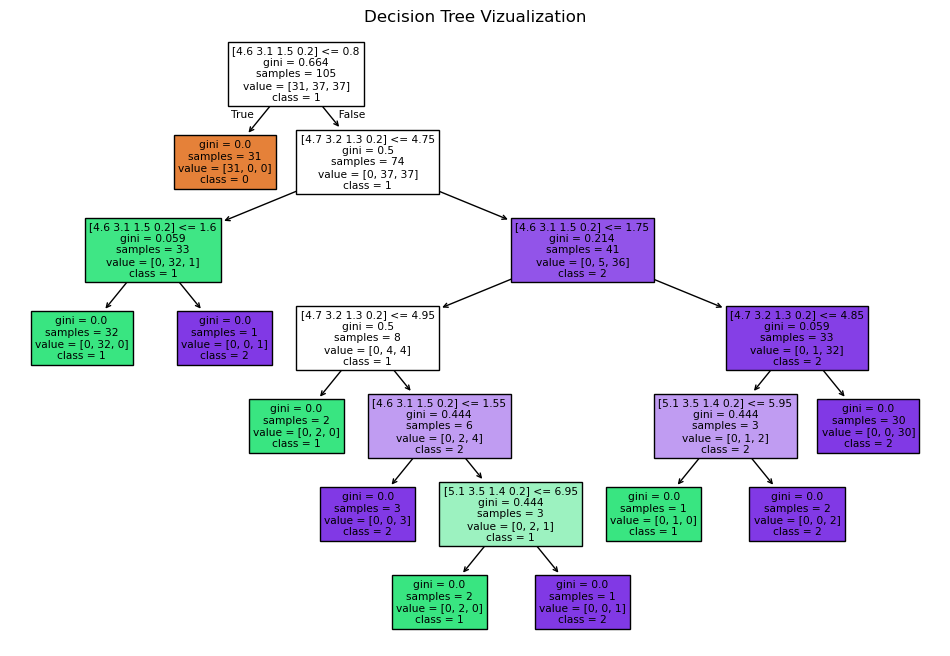

In [48]:
#vizaulize decision tree
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X, class_names=clf.classes_.astype(str), filled=True)
plt.title("Decision Tree Vizualization")
plt.show()